# Talent Squad I

Solución alternativa utilizando una red neuronal.

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import seaborn as sns

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [118]:
df_train = pd.read_csv("space_X_train.csv")
df_test = pd.read_csv("space_X_test.csv")
df_train.drop("Unnamed: 0", axis=1, inplace=True)
df_test.drop("Unnamed: 0", axis=1, inplace=True)

display(df_train.head(5))
display(df_test.head(5))

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


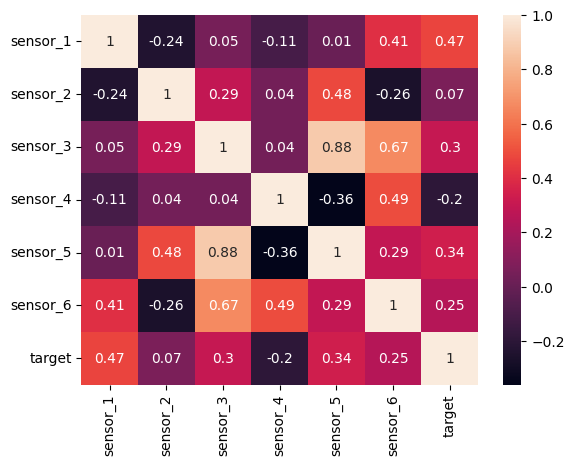

In [119]:
display(df_train.describe())

matrix = df_train.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [120]:
(rows, columns) = df_train.shape
X = df_train.iloc[:, 0:(columns - 1)]
y = df_train.iloc[:, (columns-1)]

enc = preprocessing.LabelEncoder()
enc.fit(y)
y = enc.transform(y)
y = to_categorical(y)

In [121]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [131]:
model = Sequential()
model.add(Dense(60, input_dim=6 , activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1])
history = model.fit(X, y, epochs=250, batch_size=32, validation_split=0.2)

Epoch 1/250
53/53 [==============================] - 1s 11ms/step - loss: 1.4951 - accuracy: 0.4012 - f1: 0.0349 - val_loss: 1.3969 - val_accuracy: 0.4857 - val_f1: 0.1113
Epoch 2/250
53/53 [==============================] - 0s 4ms/step - loss: 1.3196 - accuracy: 0.4905 - f1: 0.2375 - val_loss: 1.2241 - val_accuracy: 0.5262 - val_f1: 0.2958
Epoch 3/250
53/53 [==============================] - 0s 4ms/step - loss: 1.1895 - accuracy: 0.5464 - f1: 0.3050 - val_loss: 1.1044 - val_accuracy: 0.5857 - val_f1: 0.3745
Epoch 4/250
53/53 [==============================] - 0s 4ms/step - loss: 1.1017 - accuracy: 0.5827 - f1: 0.4001 - val_loss: 1.0127 - val_accuracy: 0.6095 - val_f1: 0.4457
Epoch 5/250
53/53 [==============================] - 0s 4ms/step - loss: 1.0350 - accuracy: 0.5946 - f1: 0.4328 - val_loss: 0.9459 - val_accuracy: 0.6310 - val_f1: 0.5145
Epoch 6/250
53/53 [==============================] - 0s 4ms/step - loss: 0.9767 - accuracy: 0.6268 - f1: 0.5017 - val_loss: 0.9062 - val_accurac

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])


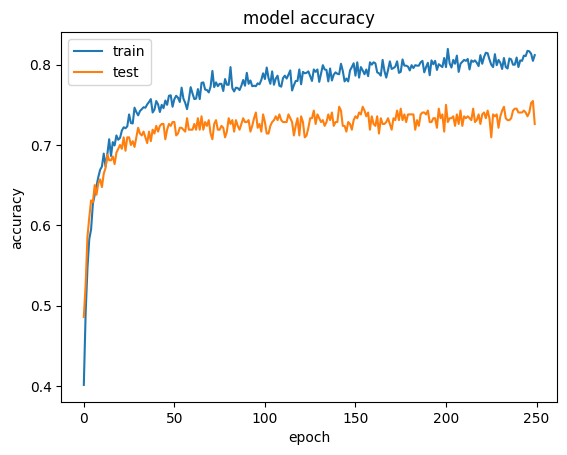

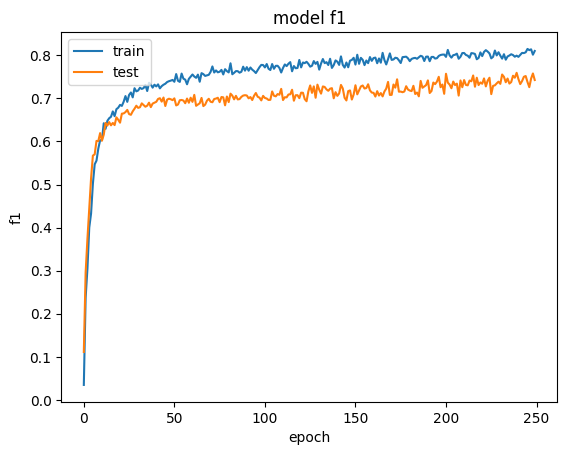

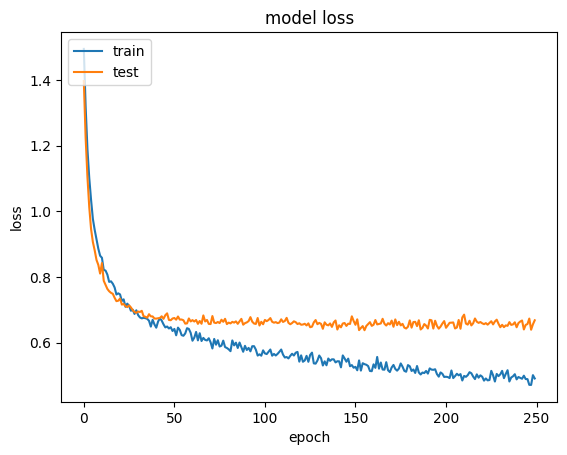

In [132]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for f1
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [133]:
preds = model.predict(X)

idx = np.argmax(preds, axis=-1)
preds = np.zeros( preds.shape )
preds[ np.arange(preds.shape[0]), idx] = 1

preds = [np.where(r==1)[0][0] for r in preds]

for i, j in zip(preds , y):
    print( " the nn predict {}, and the species to find is {}".format(i,j))

 the nn predict 4, and the species to find is [0. 0. 0. 0. 1.]
 the nn predict 0, and the species to find is [1. 0. 0. 0. 0.]
 the nn predict 1, and the species to find is [0. 1. 0. 0. 0.]
 the nn predict 3, and the species to find is [0. 0. 0. 1. 0.]
 the nn predict 0, and the species to find is [1. 0. 0. 0. 0.]
 the nn predict 2, and the species to find is [0. 0. 1. 0. 0.]
 the nn predict 1, and the species to find is [0. 1. 0. 0. 0.]
 the nn predict 0, and the species to find is [1. 0. 0. 0. 0.]
 the nn predict 4, and the species to find is [0. 0. 0. 0. 1.]
 the nn predict 0, and the species to find is [1. 0. 0. 0. 0.]
 the nn predict 2, and the species to find is [0. 0. 1. 0. 0.]
 the nn predict 0, and the species to find is [1. 0. 0. 0. 0.]
 the nn predict 0, and the species to find is [1. 0. 0. 0. 0.]
 the nn predict 2, and the species to find is [0. 0. 1. 0. 0.]
 the nn predict 1, and the species to find is [0. 0. 0. 1. 0.]
 the nn predict 0, and the species to find is [1. 0. 0.